#  🐕 Dog breed recognition: classification

|   |   |
|---|---|
| Project  |    [Classez des images à l'aide d'algorithmes de Deep Learning](https://openclassrooms.com/fr/paths/148/projects/634/assignment)         |
| Date   |   March 2023   |
| Autor  | Ana Bernal                                                    |
| Data source | [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) |
| Mentor | Samir Tanfous | 
| Notebook number  | 2 of _                                                    |

**Description:** In this notebook we 

# Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar 22 09:21:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/colab-notebooks/data

/content/drive/MyDrive/colab-notebooks/data


In [6]:
ls

images/  images_sample_15/  model.png  tb_logs/  testing/


In [7]:
!ls images_sample_15

n02085620-Chihuahua	      n02105412-kelpie
n02086910-papillon	      n02107142-Doberman
n02088364-beagle	      n02107312-miniature_pinscher
n02094433-Yorkshire_terrier   n02109047-Great_Dane
n02096294-Australian_terrier  n02112018-Pomeranian
n02097298-Scotch_terrier      n02113799-standard_poodle
n02099601-golden_retriever    n02113978-Mexican_hairless
n02105162-malinois


# Generate dataset

In [8]:
image_size = (224, 224)
batch_size = 8 # 4, 8 16

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = "images_sample_15",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2537 files belonging to 15 classes.
Using 2030 files for training.
Using 507 files for validation.


In [9]:
breed_names = train_ds.class_names
breed_names = {idx:breed for idx,breed in enumerate(breed_names)}
print(breed_names)

{0: 'n02085620-Chihuahua', 1: 'n02086910-papillon', 2: 'n02088364-beagle', 3: 'n02094433-Yorkshire_terrier', 4: 'n02096294-Australian_terrier', 5: 'n02097298-Scotch_terrier', 6: 'n02099601-golden_retriever', 7: 'n02105162-malinois', 8: 'n02105412-kelpie', 9: 'n02107142-Doberman', 10: 'n02107312-miniature_pinscher', 11: 'n02109047-Great_Dane', 12: 'n02112018-Pomeranian', 13: 'n02113799-standard_poodle', 14: 'n02113978-Mexican_hairless'}


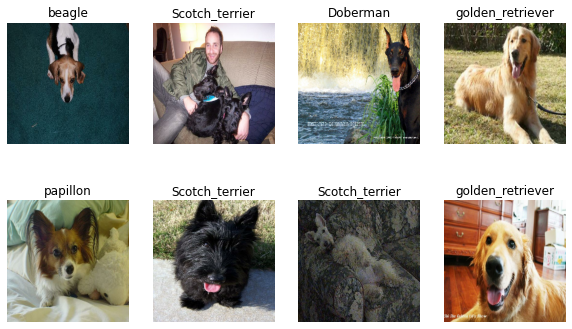

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        dir_name = breed_names[int(labels[i])]
        breed_name = dir_name.split('-')[1]
        plt.title(breed_name)
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)


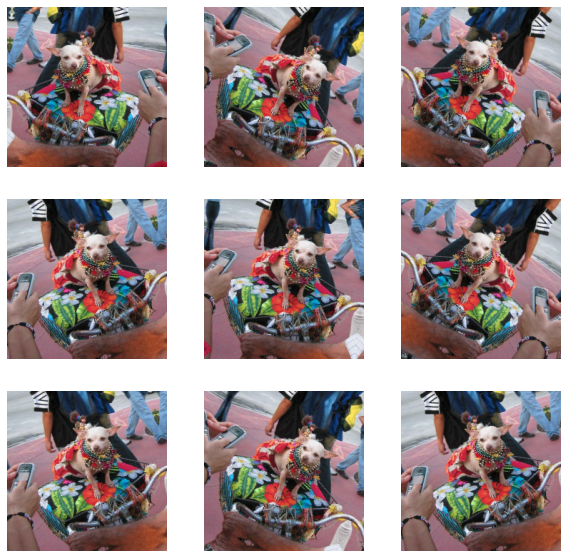

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# CNN from scratch

In [36]:
def make_cnn_model(filters, ker_sizes, units):

    # Model
    model = keras.Sequential(
        [   
            # Preprocessing
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.Rescaling(1./255),

            # Block 1
            layers.Conv2D(filters=filters[1],
                          kernel_size=ker_sizes[1],
                          strides=(1,1),
                          padding="same"),  # for having outputsize=inputsize
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 2
            layers.Conv2D(filters=filters[2],
                          kernel_size=ker_sizes[2],
                          strides=(1,1),
                          padding="same"),  # for having outputsize=inputsize
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 3
            layers.Conv2D(filters=filters[3],
                          kernel_size=ker_sizes[3],
                          strides=(1,1),
                          padding="same"),  # for having outputsize=inputsize
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 4
            layers.Conv2D(filters=filters[4],
                          kernel_size=ker_sizes[4],
                          strides=(1,1),
                          padding="same"),  # for having outputsize=inputsize
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 5
            layers.Conv2D(filters=filters[5],
                          kernel_size=ker_sizes[5],
                          strides=(1,1),
                          padding="same"),  # for having outputsize=inputsize
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 6
            layers.Flatten(),
            layers.Dense(units[1], activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(units[2], activation="relu"),
            layers.Dropout(0.5),

            layers.Dense(15, activation="softmax")
        ]
    )

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

def build_cnn_model(hp):
    filters = { 
        i : hp.Int('filters_b' + str(i),
                           min_value=16, 
                           max_value=132, 
                           step=32) for i in range(1,6)
    }
    ker_sizes = { 
        i : hp.Int('ker_size_b' + str(i),
                             min_value=3,
                             max_value=9,
                             step=3) for i in range(1,6)
    }
    units = { 1: hp.Choice('units1', values=[256, 512, 1024]),
              2: hp.Choice('units2',values=[256, 512, 1024])

    }

    model = make_cnn_model(
        filters=filters,
        ker_sizes=ker_sizes,
        units=units
    )

    return model

build_cnn_model(keras_tuner.HyperParameters())

In [ ]:
my_model = make_cnn_model(
    filters={1:, 2:, 3:, 4:, }
    ker_sizes=
    units=
)

In [17]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00


In [18]:
import keras_tuner

In [34]:
build_cnn_model(keras_tuner.HyperParameters())

In [33]:
my_cnn_mod.summary()

ValueError: ignored

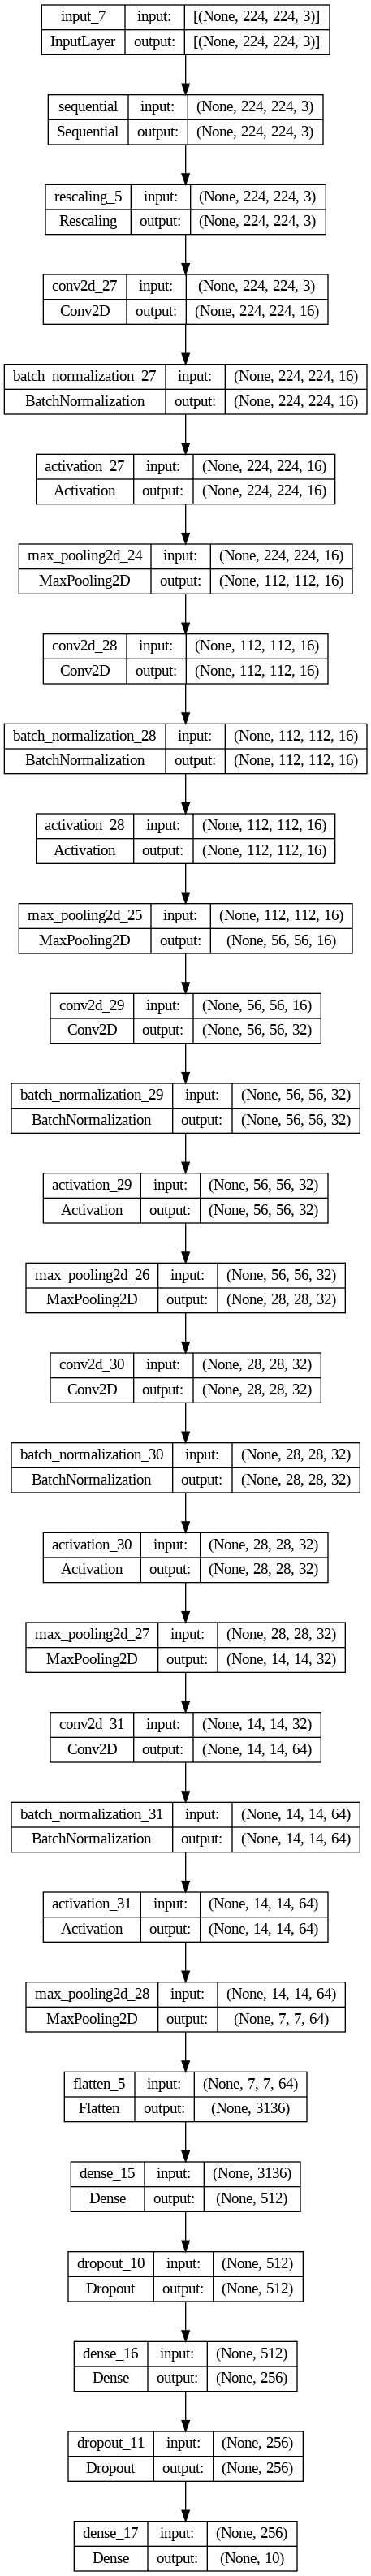

In [ ]:
# def make_cnn_model(input_shape):
#     inputs = keras.Input(shape=input_shape)

#     # Preprocessing
#     x = data_augmentation(inputs)
#     x = layers.Rescaling(1./255)(x)

#     # First block:
#     x = layers.Conv2D(filters=16,
#                       kernel_size=3,
#                       strides=(1,1),
#                       padding="same")(x)  # for having outputsize=inputsize
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

#     x = layers.Conv2D(filters=16,
#                       kernel_size=3,
#                       strides=(1,1),
#                       padding="same")(x)  # for having outputsize=inputsize
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)



#     # Second block
#     x = layers.Conv2D(filters=32,
#                       kernel_size=3,
#                       strides=(1,1),
#                       padding="same")(x)  # for having outputsize=inputsize
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)
#     #
#     x = layers.Conv2D(filters=32,
#                       kernel_size=3,
#                       strides=(1,1),
#                       padding="same")(x)  # for having outputsize=inputsize
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)
#     #
#     x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

#     # Third block
#     x = layers.Conv2D(filters=64,
#                       kernel_size=3,
#                       strides=(1,1),
#                       padding="same")(x)  # for having outputsize=inputsize
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

#     # Third block
#     x = layers.Flatten()(x)

#     x = layers.Dense(512, activation="relu")(x)
#     x = layers.Dropout(0.5)(x)
#     x = layers.Dense(256, activation="relu")(x)
#     x = layers.Dropout(0.5)(x)

#     outputs = layers.Dense(10, activation="softmax")(x)

#     return keras.Model(inputs,outputs)


# model = make_cnn_model(input_shape=image_size + (3,))
# keras.utils.plot_model(model, show_shapes=True)
    


In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 batch_normalization_27 (Bat  (None, 224, 224, 16)     64        
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 224, 224, 16)      0         
                                                           

## Training

In [ ]:
epochs = 20

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

Epoch 1/20


146/146 [==============================] - 463s 3s/step - loss: 3.6826 - accuracy: 0.1099 - val_loss: 2.3021 - val_accuracy: 0.1142
Epoch 2/20
146/146 [==============================] - 8s 53ms/step - loss: 2.3666 - accuracy: 0.1270 - val_loss: 2.2945 - val_accuracy: 0.1363
Epoch 3/20
146/146 [==============================] - 9s 63ms/step - loss: 2.3038 - accuracy: 0.1185 - val_loss: 2.2669 - val_accuracy: 0.1543
Epoch 4/20
146/146 [==============================] - 11s 73ms/step - loss: 2.2568 - accuracy: 0.1476 - val_loss: 2.3163 - val_accuracy: 0.0982
Epoch 5/20
146/146 [==============================] - 10s 66ms/step - loss: 2.2570 - accuracy: 0.1433 - val_loss: 2.2058 - val_accuracy: 0.1463
Epoch 6/20
146/146 [==============================] - 12s 81ms/step - loss: 2.2636 - accuracy: 0.1502 - val_loss: 2.1908 - val_accuracy: 0.1623
Epoch 7/20
146/146 [==============================] - 9s 63ms/step - loss: 2.2441 - accuracy: 0.1494 - val_loss: 2.1436 - val_accuracy: 0.2084
Epoch 8

Hyperparameters tuning

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.6 MB/s eta 0:00:00


In [26]:
import keras_tuner

def build_cnn_model(hp):
    # Hyperparameters
    filters = {
        'filters_b' + str(i) : hp.Int('filters_b' + str(i), 
                                      min_value=16, 
                                      max_value=132, 
                                      step=32) for i in range(1,6)
    }
    kernel_sizes = {
        'ker_size_b' + str(i) : hp.Int('ker_size_b' + str(i),
                                       min_value=3,
                                       max_value=9,
                                       step=3) for i in range(1,6)
    }


    model = keras.Sequential()

    # Preprocessing
    model.add(layers.RandomFlip("horizontal"))
    model.add(layers.RandomRotation(0.1))
    model.add(layers.Rescaling(1./255))

    # Block 1:
    model.add(layers.Conv2D(filters=filters['filters_b1'],
                      kernel_size=kernel_sizes['ker_size_b1'],
                      strides=(1,1),
                      padding="same"))  # for having outputsize=inputsize
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Block 2:
    model.add(layers.Conv2D(filters=filters['filters_b2'],
                      kernel_size=kernel_sizes['ker_size_b2'],
                      strides=(1,1),
                      padding="same"))  # for having outputsize=inputsize
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Block 3:
    model.add(layers.Conv2D(filters=filters['filters_b3'],
                      kernel_size=kernel_sizes['ker_size_b3'],
                      strides=(1,1),
                      padding="same"))  # for having outputsize=inputsize
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # Block 4:
    model.add(layers.Conv2D(filters=filters['filters_b4'],
                      kernel_size=kernel_sizes['ker_size_b4'],
                      strides=(1,1),
                      padding="same"))  # for having outputsize=inputsize
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Block 5:
    model.add(layers.Conv2D(filters=filters['filters_b5'],
                      kernel_size=kernel_sizes['ker_size_b5'],
                      strides=(1,1),
                      padding="same"))  # for having outputsize=inputsize
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Third block
    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


# model = make_cnn_model(input_shape=image_size + (3,))
# keras.utils.plot_model(model, show_shapes=True)
build_cnn_model(keras_tuner.HyperParameters())


In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_cnn_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    directory='.',
    project_name='testing'
)

tuner.search_space_summary()

Search space summary
Default search space size: 10
filters_b1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 132, 'step': 32, 'sampling': 'linear'}
filters_b2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 132, 'step': 32, 'sampling': 'linear'}
filters_b3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 132, 'step': 32, 'sampling': 'linear'}
filters_b4 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 132, 'step': 32, 'sampling': 'linear'}
filters_b5 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 132, 'step': 32, 'sampling': 'linear'}
ker_size_b1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 9, 'step': 3, 'sampling': 'linear'}
ker_size_b2 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 9, 'step': 3, 'sampling': 'linear'}
ker_size_b3 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 9, 'step': 3, 'sam

In [ ]:
tuner.search(
    train_ds, 
    epochs=2, 
    validation_data=val_ds,
    callbacks=[keras.callbacks.TensorBoard('./tb_logs')])


Trial 8 Complete [00h 00m 39s]
val_accuracy: 0.1897590309381485

Best val_accuracy So Far: 0.3326653242111206
Total elapsed time: 00h 03m 08s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
112               |112               |filters_b1
112               |48                |filters_b2
16                |112               |filters_b3
112               |48                |filters_b4
48                |16                |filters_b5
6                 |6                 |ker_size_b1
6                 |6                 |ker_size_b2
6                 |3                 |ker_size_b3
3                 |3                 |ker_size_b4
3                 |3                 |ker_size_b5

Epoch 1/2


117/167 [====================>.........] - ETA: 5s - loss: 3.1963 - accuracy: 0.1303

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]

In [ ]:
best_hps